In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from scipy import stats
%matplotlib inline

In [3]:
# 1. Daten Laden
df = pd.read_csv('allData.csv')

# Features auswählen
features = ['t_jup', 'i']
X_original = df[features].dropna()
X_original.head()

/var/folders/tv/kwzyy9z51hl6kg2pqz9rjhz00000gn/T/ipykernel_6279/2730566747.py:2: DtypeWarning: Columns (17,23,24,25,36,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('allData.csv')


,t_jup,i
0,3.31,10.59
1,3.04,34.93
2,3.30,12.99
3,3.54,7.14
4,3.40,5.36


/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

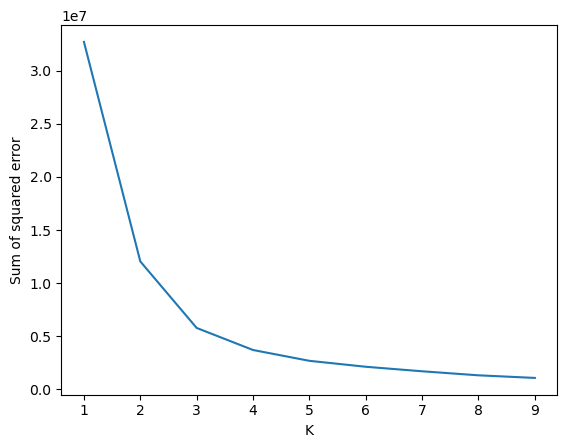

In [4]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X_original[['t_jup', 'i']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [5]:
# 3. Skalieren (StandardScaler ist robuster gegen leichte Ausreißer als MinMax)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# 4. Clustering auf den SKALIERTEN Daten
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # k=3 aus Elbow-Methode
cluster_labels = kmeans.fit_predict(X_scaled)

X_original['cluster'] = cluster_labels
X_original.head()

,t_jup,i,cluster
0,3.31,10.59,1
1,3.04,34.93,1
2,3.30,12.99,1
3,3.54,7.14,0
4,3.40,5.36,0


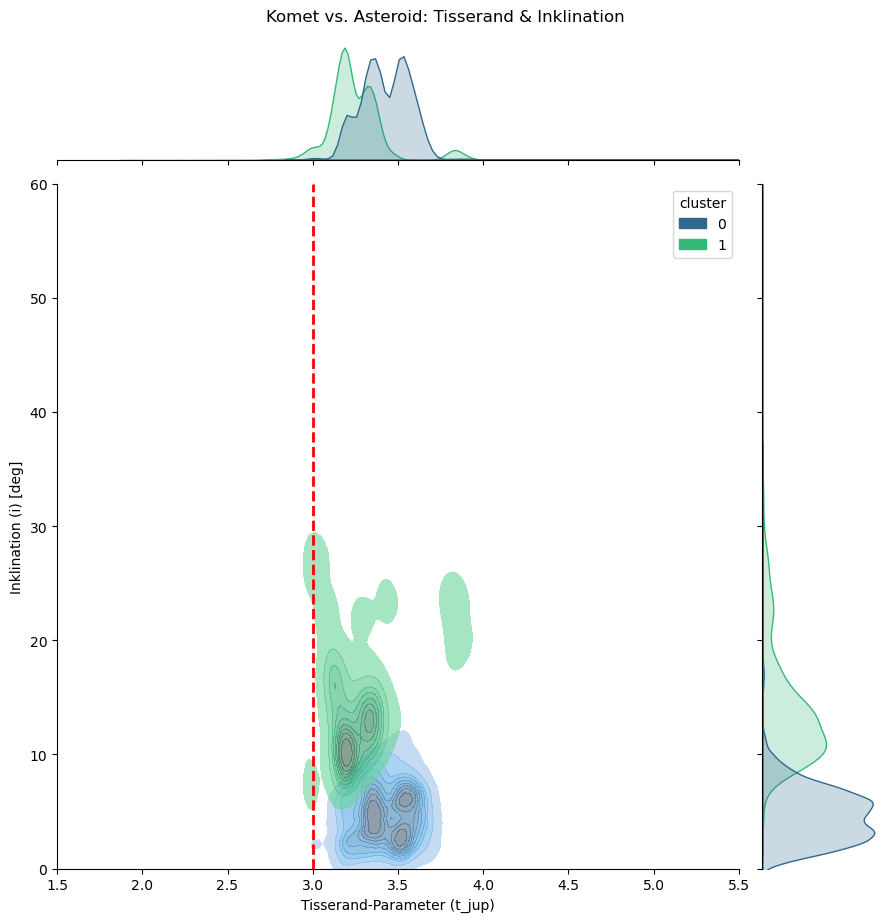

In [7]:
df_plot = X_original.sample(n=20000, random_state=42)

# 2. Der Plot
g = sns.jointplot(
    data=df_plot,
    x='t_jup', 
    y='i', 
    hue='cluster',     # Automatische Einfärbung nach Cluster
    kind='kde',        # 'kde' = Weiche Konturen (sieht am edelsten aus)
    palette='viridis', # Gute Farbwahl für Kontraste
    fill=True,         # Flächen füllen
    alpha=0.6,         # Transparenz, damit man Überlappungen sieht
    height=9,          # Größe des Bildes
    xlim=(1.5, 5.5),   # Fokus auf den Übergangsbereich
    ylim=(0, 60)       # Fokus auf Inklination
)

# 3. Feinschliff
g.fig.suptitle('Komet vs. Asteroid: Tisserand & Inklination', y=1.02)
g.set_axis_labels('Tisserand-Parameter (t_jup)', 'Inklination (i) [deg]')

# Die Kometen-Grenze einzeichnen (Senkrechte Linie bei 3.0)
g.ax_joint.axvline(x=3.0, color='red', linestyle='--', linewidth=2, label='Grenze T_J=3.0')

plt.show()

In [8]:
df.loc[X_original.index, 'cluster'] = X_original['cluster']
df.to_csv('clustered_kometVsAsteroid_kmeans.csv', index=False)